## 自由時報爬蟲

In [1]:
import requests
res = requests.get('http://news.ltn.com.tw/list/breakingnews')
res

<Response [200]>

In [3]:
#res.text

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

### Example
````
<ul class="list imm">
<li>...</li>
</ul>

````

#### CSS Selector
- http://www.w3school.com.cn/css/css_selector_attribute.asp

In [8]:
#soup.select('ul.list.imm li')
#soup.select('ul.imm li')
#soup.select('.imm li')

In [28]:
newsary = []
for news in soup.select('.imm li'):
    #print(news)
    title = news.select_one('.tit p').text.strip()
    dt    = news.select_one('.tit span').text.strip()
    link  = news.select_one('a.tit').get('href')
    #category = news.select('.tagarea a')
    #tag_ary = []
    #for c in category:
    #    tag_ary.append(c.text)
    category = ','.join([c.text for c in news.select('.tagarea a')])
    
    newsdic = {'title':title, 'dt':dt, 'link':link, 'category':category}
    newsary.append(newsdic)
    #print('==========================')

In [30]:
import pandas
df = pandas.DataFrame(newsary)

In [32]:
df.to_excel('ltn_news.xlsx')

## Numpy

In [33]:
a = [1,2,3,4,5,'S']

In [34]:
b = [2,3,4,5,6,7]

In [35]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

In [37]:
len(a)

5

In [40]:
res = []
for i in range(0, len(a)):
    res.append(a[i] * b[i])

In [41]:
res

[2, 12, 30, 56, 90]

In [45]:
[a[i] * b[i] for i in range(0, len(a))]

[2, 12, 30, 56, 90]

In [46]:
zip(a,b)

In [48]:
for rec in zip(a,b):
    print(rec)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [49]:
for i,j in zip(a,b):
    print(i,j)

1 2
3 4
5 6
7 8
9 10


In [50]:
for i,j in zip(a,b):
    print(i * j)

2
12
30
56
90


In [51]:
res = []
for i,j in zip(a,b):
    res.append(i * j)
res

[2, 12, 30, 56, 90]

In [52]:
[i * j for i,j in zip(a,b)]

[2, 12, 30, 56, 90]

In [53]:
a

[1, 3, 5, 7, 9]

In [54]:
type(a)

list

In [55]:
import numpy 
na = numpy.array(a)
na

array([1, 3, 5, 7, 9])

In [56]:
type(na)

numpy.ndarray

In [57]:
nb = numpy.array(b)
nb

array([ 2,  4,  6,  8, 10])

In [58]:
nc = na * nb

In [59]:
nc

array([ 2, 12, 30, 56, 90])

In [63]:
na + nb
na - nb
na * nb
na / nb

array([0.5       , 0.75      , 0.83333333, 0.875     , 0.9       ])

In [64]:
import numpy as np
na = np.array([1, 2, 3, 4, 5])
na

array([1, 2, 3, 4, 5])

In [66]:
na[0]

1

In [67]:
na[-1]

5

In [68]:
na[1:3]

array([2, 3])

In [70]:
a
[c for c in a if c >3]

[5, 7, 9]

In [72]:
na > 3

array([False, False, False,  True,  True])

In [73]:
na[na > 3]

array([4, 5])

In [74]:
na = np.array([[1, 2, 3, 4, 5],
[6, 7, 8, 9, 10]])

In [75]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [76]:
na[0, 0]

1

In [77]:
na[0, :]

array([1, 2, 3, 4, 5])

In [78]:
na[:, 0]

array([1, 6])

In [79]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [80]:
na = np.array([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M',35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [81]:
na

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U5')

In [82]:
na = np.array([ ['name', 'gender', 'age'],  ['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M',35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
na

array([['name', 'gender', 'age'],
       ['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U6')

In [85]:
import pandas
df = pandas.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M',35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [87]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [88]:
df.columns = ['name', 'gender', 'age']

In [89]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


## Pandas Series

In [90]:
a = [21000, 18900, 18000]
a

[21000, 18900, 18000]

In [91]:
type(a)

list

In [93]:
import numpy as np
na = np.array(a)
na

array([21000, 18900, 18000])

In [95]:
type(na)

numpy.ndarray

In [96]:
import pandas as pd
pa = pd.Series(a)
pa

0    21000
1    18900
2    18000
dtype: int64

In [97]:
type(pa)

pandas.core.series.Series

In [98]:
pa = pd.Series([21000, 18900, 18000], index =
['Iphone', 'Edge S7', 'HTC M1'])

In [99]:
pa

Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [100]:
s = pd.Series({'Iphone':21000,'Edge S7':18900,'HTC M1':18000})
s

Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [101]:
s[2]

18000

In [103]:
s[1:3]

Edge S7    18900
HTC M1     18000
dtype: int64

In [104]:
s['Iphone']

21000

In [106]:
s[['Iphone', 'Edge S7']]

Iphone     21000
Edge S7    18900
dtype: int64

In [107]:
s

Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [108]:
s < 20000

Iphone     False
Edge S7     True
HTC M1      True
dtype: bool

In [109]:
s[s<20000]

Edge S7    18900
HTC M1     18000
dtype: int64

In [111]:
s['Iphone'] = 20000

In [112]:
s

Iphone     20000
Edge S7    18900
HTC M1     18000
dtype: int64

In [115]:
s[s< 20000] * 0.8

Edge S7    15120.0
HTC M1     14400.0
dtype: float64

In [116]:
s[s<20000] = s[s< 20000] * 0.8

In [117]:
s

Iphone     20000
Edge S7    15120
HTC M1     14400
dtype: int64

In [120]:
'Iphone' in s

True

In [121]:
'mi' in s

False

In [122]:
s

Iphone     20000
Edge S7    15120
HTC M1     14400
dtype: int64

In [123]:
s * 0.8

Iphone     16000.0
Edge S7    12096.0
HTC M1     11520.0
dtype: float64

In [124]:
np.sqrt(s)

Iphone     141.421356
Edge S7    122.963409
HTC M1     120.000000
dtype: float64

In [125]:
s

Iphone     20000
Edge S7    15120
HTC M1     14400
dtype: int64

In [126]:
s.max()

20000

In [127]:
s.mean()

16506.666666666668

In [128]:
s.describe()

count        3.000000
mean     16506.666667
std       3046.659373
min      14400.000000
25%      14760.000000
50%      15120.000000
75%      17560.000000
max      20000.000000
dtype: float64

In [129]:
s[['Iphone', 'HTC M1']] 

Iphone    20000
HTC M1    14400
dtype: int64

In [130]:
s[['mi', 'HTC M1']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


mi            NaN
HTC M1    14400.0
dtype: float64

In [131]:
s[['Iphone', 'HTC M1']]  + s[['mi', 'HTC M1']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


HTC M1    28800.0
Iphone        NaN
mi            NaN
dtype: float64

In [132]:
s2 = s[['Iphone', 'HTC M1']]  + s[['mi', 'HTC M1']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [134]:
s2.isnull()

HTC M1    False
Iphone     True
mi         True
dtype: bool

In [135]:
s2.notnull()

HTC M1     True
Iphone    False
mi        False
dtype: bool

In [137]:
import math
dic = {'a':59, 'b':70, 'c':80}
[math.sqrt(c) * 10 for c in dic.values()]

[76.81145747868608, 83.66600265340756, 89.44271909999159]

In [139]:
import pandas
dic = {'a':59, 'b':70, 'c':80}
na = pandas.Series(dic)
np.sqrt(na) * 10

a    76.811457
b    83.666003
c    89.442719
dtype: float64

In [140]:
import pandas
ary = [59, 70, 80]
na = np.array(ary)
na

array([59, 70, 80])

In [142]:
for name, garade in zip(['david', 'mary'], [58,99]):
    print(name, garade)

david 58
mary 99


## ZIP 應用案例

In [161]:
import requests
from bs4 import BeautifulSoup
res   = requests.get('https://www.104.com.tw/job/?jobno=6b8zr&jobsource=joblist_a_relevance')
soup  = BeautifulSoup(res.text, 'lxml')
dd = [e.text for e in soup.select('.info')[1].select('.content dl dd')]

In [162]:
dd

['上班族、外籍人士',
 '2年以上',
 '大學以上',
 '不拘',
 '\n英文 -- 聽 /中等、說 /中等、讀 /精通、寫 /中等\n',
 'Linux、Python',
 '系統架構規劃、軟體工程系統開發、軟體品質與保證、軟體整合測試、軟體程式設計',
 '未填寫']

In [163]:
dt = [e.text for e in soup.select('.info')[1].select('.content dl dt')]

In [164]:
dt

['接受身份：', '工作經歷：', '學歷要求：', '科系要求：', '語文條件：', '擅長工具：', '工作技能：', '其他條件：']

In [165]:
a = []
for rec in zip(dt, dd):
    a.append(rec)

In [166]:
a

[('接受身份：', '上班族、外籍人士'),
 ('工作經歷：', '2年以上'),
 ('學歷要求：', '大學以上'),
 ('科系要求：', '不拘'),
 ('語文條件：', '\n英文 -- 聽 /中等、說 /中等、讀 /精通、寫 /中等\n'),
 ('擅長工具：', 'Linux、Python'),
 ('工作技能：', '系統架構規劃、軟體工程系統開發、軟體品質與保證、軟體整合測試、軟體程式設計'),
 ('其他條件：', '未填寫')]

In [160]:
s[1:3:2]

Edge S7    15120
dtype: int64

## Pandas DataFrame 

In [167]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F',23], ['tom', 'M', 35], 
                   ['ted', 'M', 33], ['jean', 'F', 21],['lisa', 'F', 20]])


In [168]:
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [169]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [170]:
df.columns = ['name', 'gender', 'age']

In [171]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [172]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29, 50000], ['mary', 'F',23], ['tom', 'M', 35], 
                   ['ted', 'M', 33], ['jean', 'F', 21],['lisa', 'F', 20]])


In [173]:
df

,0,1,2,3
0,frank,M,29,50000.0
1,mary,F,23,NaN
2,tom,M,35,NaN
3,ted,M,33,NaN
4,jean,F,21,NaN
5,lisa,F,20,NaN


In [176]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom','M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]],
columns = ['name', 'gender', 'age'])


In [177]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [178]:
df = pd.DataFrame([
    {'name':'frank','gender':'M', 'age':29}, \
{'name':'mary','gender':'F', 'age':23},      \
{'name':'tom','gender':'M', 'age':35},       \
{'name':'ted','gender':'M', 'age':33},       \
{'name':'jean','gender':'F', 'age':21},      \
{'name':'lisa','gender':'F', 'age':20}])

In [179]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [180]:
df.head()

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean


In [181]:
?df.head()

In [182]:
df.head(3)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom


In [183]:
df.tail(3)

,age,gender,name
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [184]:
print(df)

   age gender   name
0   29      M  frank
1   23      F   mary
2   35      M    tom
3   33      M    ted
4   21      F   jean
5   20      F   lisa


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
age       6 non-null int64
gender    6 non-null object
name      6 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [187]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [188]:
df.dtypes

age        int64
gender    object
name      object
dtype: object

In [190]:
df.iloc[0]

age          29
gender        M
name      frank
Name: 0, dtype: object

In [192]:
df.iloc[1:4]

,age,gender,name
1,23,F,mary
2,35,M,tom
3,33,M,ted


In [194]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [196]:
df.name

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [195]:
type(df['name'])

pandas.core.series.Series

In [197]:
df[ ['name', 'gender']  ]

,name,gender
0,frank,M
1,mary,F
2,tom,M
3,ted,M
4,jean,F
5,lisa,F


In [201]:
s = [0,1,2,3]
s[:]
s[::]

[0, 1, 2, 3]

In [199]:
df.iloc[1:4]

,age,gender,name
1,23,F,mary
2,35,M,tom
3,33,M,ted


In [202]:
df.iloc[ 1:4  , :   ]

,age,gender,name
1,23,F,mary
2,35,M,tom
3,33,M,ted


In [203]:
df.iloc[ 1:4  , 0:2   ]

,age,gender
1,23,F
2,35,M
3,33,M


In [204]:
df.iloc[ 1:4  , [0,2]   ]

,age,name
1,23,mary
2,35,tom
3,33,ted


In [208]:
male = df['gender'] == 'M'

In [210]:
df[male]

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [211]:
df[df['gender'] == 'M']

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [213]:
df['age'] > 30

0    False
1    False
2     True
3     True
4    False
5    False
Name: age, dtype: bool

In [214]:
(df['age'] > 30) & (df['gender'] == 'M')

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [215]:
df[(df['age'] > 30) & (df['gender'] == 'M')]

,age,gender,name
2,35,M,tom
3,33,M,ted


In [216]:
df[(df['age'] > 30) | (df['gender'] == 'M')]

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [226]:
df[~(df['gender'] == 'M')]

,age,gender,name
1,23,F,mary
4,21,F,jean
5,20,F,lisa


In [228]:
df['employee'] =True

In [230]:
df

,age,gender,name,employee
0,29,M,frank,True
1,23,F,mary,True
2,35,M,tom,True
3,33,M,ted,True
4,21,F,jean,True
5,20,F,lisa,True


In [231]:
del df['employee']

In [232]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [233]:
a = 100

In [234]:
a * 2

200

In [235]:
del a

In [236]:
a * 2

NameError: name 'a' is not defined

In [238]:
df['employee'] = True

In [242]:
df2 = df.drop('employee', axis = 1)

In [244]:
df2

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [245]:
df.drop('employee', axis = 1, inplace=True)

In [246]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [248]:
df.loc[7] = {'name':'qoo', 'gender': 'M', 'age':12}

In [249]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
7,12,M,qoo


In [251]:
df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo'}]))

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
7,12,M,qoo
0,20,F,qoo


In [253]:
df = df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo'}]), ignore_index=True)

In [255]:
df.drop(6)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
7,20,F,qoo


In [256]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,12,M,qoo
7,20,F,qoo


In [257]:
#df = df.drop(6)
df.drop(6, inplace=True)

In [258]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
7,20,F,qoo


In [259]:
df.drop(7, inplace=True)

In [260]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [261]:
df['userid'] = range(101,107)

In [262]:
df

,age,gender,name,userid
0,29,M,frank,101
1,23,F,mary,102
2,35,M,tom,103
3,33,M,ted,104
4,21,F,jean,105
5,20,F,lisa,106


In [263]:
df.set_index('userid', inplace=True)

In [264]:
df

,age,gender,name
userid,,,
101,29,M,frank
102,23,F,mary
103,35,M,tom
104,33,M,ted
105,21,F,jean
106,20,F,lisa


In [266]:
df.iloc[0:2,[0,2]]

,age,name
userid,,
101,29,frank
102,23,mary


In [267]:
df.loc[[101,102]  , ['age', 'name'] ]

,age,name
userid,,
101,29,frank
102,23,mary


In [269]:
def over30(e):
    if e > 30:
        return True
    return False
df['ageover30'] = df['age'].map(over30)

In [273]:
df['age'].astype(float)

userid
101    29.0
102    23.0
103    35.0
104    33.0
105    21.0
106    20.0
Name: age, dtype: float64

In [275]:
df = pandas.DataFrame([['a', 1], ['b', 2]])
df

,0,1
0,a,1
1,b,2


In [277]:
df.index = [99,100]

In [278]:
df

,0,1
99,a,1
100,b,2


In [279]:
df

,0,1
99,a,1
100,b,2


## 處理缺失值

In [280]:
import numpy as np
np.nan

nan

In [316]:
import pandas as pd
import numpy as np
df = pd.DataFrame([\
    ['frank', 'M', np.nan], \
    ['mary', np.nan, np.nan], \
    ['tom' , 'M', 35], \
    ['ted' , 'M', 33], \
    ['jean' , np.nan, 21], \
    ['lisa', 'F', 20]])


df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [283]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [284]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [286]:
df.isnull()

,name,gender,age
0,False,False,True
1,False,True,True
2,False,False,False
3,False,False,False
4,False,True,False
5,False,False,False


In [291]:
df['name'].isnull().values.any()

False

In [293]:
df.isnull().values.any()

True

In [297]:
df.isnull().astype(int)

,name,gender,age
0,0,0,1
1,0,1,1
2,0,0,0
3,0,0,0
4,0,1,0
5,0,0,0


In [298]:
df.isnull().sum()

name      0
gender    2
age       2
dtype: int64

In [299]:
df.isnull().sum().sum()

4

In [301]:
df.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [303]:
#df

In [305]:
df.dropna(how = 'all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [306]:
df.dropna(thresh = 2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [307]:
df['employee'] = np.nan

In [308]:
df

,name,gender,age,employee
0,frank,M,NaN,NaN
1,mary,NaN,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN
5,lisa,F,20.0,NaN


In [310]:
df.dropna(how='all', axis = 1, inplace=True)

In [317]:
df['age'].fillna(0)

0     0.0
1     0.0
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [318]:
df["age"].mean()

27.25

In [319]:
df['age'].fillna(df["age"].mean())

0    27.25
1    27.25
2    35.00
3    33.00
4    21.00
5    20.00
Name: age, dtype: float64

In [322]:
# select gender, avg(age) from df group by gender
df.groupby("gender")["age"].mean()

gender
F    20.0
M    34.0
Name: age, dtype: float64

In [324]:
df['gender']

0      M
1    NaN
2      M
3      M
4    NaN
5      F
Name: gender, dtype: object

In [323]:
df.groupby("gender")["age"].transform("mean")

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [325]:
df['age'].fillna(df.groupby("gender")["age"].transform("mean"))

0    34.0
1     NaN
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

## Titanic
- https://www.kaggle.com/nareaero/titanic-survival-python-solution

In [326]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [327]:
df.fillna(method='pad')

,name,gender,age
0,frank,M,NaN
1,mary,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,M,21.0
5,lisa,F,20.0


In [329]:
df.fillna(method='bfill',limit = 2)

,name,gender,age
0,frank,M,35.0
1,mary,M,35.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,F,21.0
5,lisa,F,20.0


In [330]:
df2 = pd.DataFrame([[1, 870],\
        [2, 900],\
        [np.nan, np.nan],\
        [4, 950],\
        [5,1080],\
        [6,1200]])
df2.columns = ['time','val']


In [331]:
df2

,time,val
0,1.0,870.0
1,2.0,900.0
2,NaN,NaN
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


In [333]:
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


## 數據轉換

In [336]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col=0)

In [338]:
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
detail_url       70315 non-null object
search_date      70315 non-null object
title            70315 non-null object
address          70315 non-null object
floor_info       69686 non-null object
price            70315 non-null object
layout           22630 non-null object
building_area    70315 non-null float64
building_use     65330 non-null object
latitude         70315 non-null float64
longitude        70315 non-null float64
dtypes: float64(3), object(8)
memory usage: 6.4+ MB


In [345]:
df['building_area'].head() / 0.3025

0    19.834711
1    33.057851
2    26.446281
3    26.446281
4    23.140496
Name: building_area, dtype: float64

In [346]:
import numpy as np
np.sqrt(df['building_area'].head())

0    2.449490
1    3.162278
2    2.828427
3    2.828427
4    2.645751
Name: building_area, dtype: float64

In [350]:
(df['address'] + '-' + df['price']).head()

0       高雄市湖內區民生街-4,500元/月
1       新北市蘆洲區長安街-7,500元/月
2    新北市永和區中山路一段-11,000元/月
3       屏東縣潮州鎮六合路-5,000元/月
4       桃園市觀音區四維路-5,000元/月
dtype: object

In [351]:
df['square_feet'] = df['building_area'] / 0.3025

In [353]:
#df

In [358]:
s = '4,500元/月'
int(s.replace('元/月','').replace(',', ''))

def normalizePrice(e):
    return int(e.replace('元/月','').replace(',', ''))

In [361]:
df['price'].map(normalizePrice).head()

0     4500
1     7500
2    11000
3     5000
4     5000
Name: price, dtype: int64

In [362]:
def square(e):
    return e ** 2
square(3)

9

In [364]:
square2 = lambda e : e**2
square2(3)

9

In [365]:
df['price'].map(lambda e : int(e.replace('元/月','').replace(',', ''))).head()

0     4500
1     7500
2    11000
3     5000
4     5000
Name: price, dtype: int64

In [366]:
df = pandas.DataFrame(\
[\
    [60,70,50],\
    [80,79,68],\
    [63,66,82]], \
    columns = ['First', 'Second', 'Third'])


In [367]:
df

,First,Second,Third
0,60,70,50
1,80,79,68
2,63,66,82


In [370]:
df.apply(lambda e: e.max() - e.min() , axis = 1)

0    20
1    12
2    19
dtype: int64

In [371]:
df.apply(lambda e: e.max() - e.min() , axis = 0)

First     20
Second    13
Third     32
dtype: int64

In [373]:
df = pandas.DataFrame(\
[\
    [60,np.nan,50],\
    [80,79,68],\
    [63,66,np.nan]], \
    columns = ['First', 'Second', 'Third'])


In [376]:
# fillna
df.fillna(0)

,First,Second,Third
0,60,0.0,50.0
1,80,79.0,68.0
2,63,66.0,0.0


In [379]:
# applymap
df.applymap(lambda e: 0 if pd.isnull(e) else 1)

,First,Second,Third
0,1,0,1
1,1,1,1
2,1,1,0


## 轉換時間資料

In [381]:
#['2015-03-01', '2017-07-02']

from datetime import datetime
datetime.now()

datetime.datetime(2018, 10, 6, 14, 37, 15, 706426)

### strftime

In [386]:
import locale
locale.getlocale()

(None, None)

In [390]:
locale.setlocale(locale.LC_ALL, 'zh')

'zh'

In [391]:
current_time = datetime.now()
current_time.strftime('%Y-%m-%d %B')

'2018-10-06 十月'

### strptime

In [392]:
datetime.strptime('2018-07-21', '%Y-%m-%d')

datetime.datetime(2018, 7, 21, 0, 0)

In [393]:
from datetime import timedelta

In [395]:
current_time - timedelta(days = 1)

datetime.datetime(2018, 10, 5, 14, 40, 49, 200637)

In [397]:
for i in range(1,10):
    #print(current_time - timedelta(days = i))
    print((current_time - timedelta(days = i)).strftime('%Y-%m-%d'))

2018-10-05
2018-10-04
2018-10-03
2018-10-02
2018-10-01
2018-09-30
2018-09-29
2018-09-28
2018-09-27


In [408]:
import requests
import time
import pandas
bigthree = []
for i in range(1,11):    
    try:
        dt = (current_time - timedelta(days = i)).strftime('%Y%m%d')
        print(dt)
        res = requests.get('http://www.twse.com.tw/fund/BFI82U?response=json&dayDate={}&type=day'.format(dt))
        df = pandas.DataFrame(res.json()['data'])
        df.columns  = ['單位名稱','買進金額','賣出金額','買賣差額']
        df['date'] = current_time - timedelta(days = i)
        bigthree.append(df)
        time.sleep(3)
    except:
        pass

20181005
20181004
20181003
20181002
20181001
20180930
20180929
20180928
20180927
20180926


In [409]:
dfall= pandas.concat(bigthree)

In [422]:
dfall2 = dfall.loc[dfall['單位名稱'] == '外資及陸資(不含外資自營商)', ['買賣差額', 'date']]

In [423]:
dfall2.set_index('date', inplace=True)

In [424]:
dfall2['買賣差額'] = dfall2['買賣差額'].map(lambda e: int(e.replace(',','')) )

Populating the interactive namespace from numpy and matplotlib


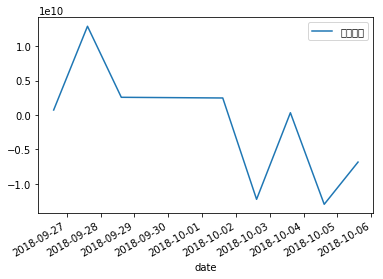

In [425]:
%pylab inline
dfall2.plot(kind = 'line')

In [429]:
import time
time.mktime(current_time.timetuple())

1538808049.0

In [433]:
from datetime import date
date.fromtimestamp(1492859823)

datetime.date(2017, 4, 22)

In [434]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col=0)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
detail_url       70315 non-null object
search_date      70315 non-null object
title            70315 non-null object
address          70315 non-null object
floor_info       69686 non-null object
price            70315 non-null object
layout           22630 non-null object
building_area    70315 non-null float64
building_use     65330 non-null object
latitude         70315 non-null float64
longitude        70315 non-null float64
dtypes: float64(3), object(8)
memory usage: 6.4+ MB


In [437]:
df['search_date'].dtypes

dtype('O')

In [440]:
df['search_date'] = pandas.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [443]:
df[df['search_date'] > '2017-05-13'].head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
6,https://rent.591.com.tw/rent-detail-1299940.html,2017-05-14,近明新、台元/全新完工/飯店式電梯套房,新竹縣新豐鄉康樂路一段,3F/5F,"6,500元/月",NaN,7.0,電梯大樓/雅房,24.871279,120.986334
7,https://rent.591.com.tw/rent-detail-1051432.html,2017-05-14,附網路電視包水費!離逢甲商圈近,台中市西屯區西屯路二段,3F/5F,"3,000元/月",NaN,4.0,透天厝/雅房,24.173195,120.645027
9,https://rent.591.com.tw/rent-detail-1245175.html,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,"17,000元/月",2房1廳2衛2陽臺,32.0,電梯大樓/整層住家,25.130052,121.720788


In [450]:
#df['search_date'].dt.year
#df['search_date'].dt.month
#df['search_date'].dt.day
#df['search_date'].dt.date

## Dummy Variable

In [504]:
df7 = pandas.DataFrame([[23, 35000,'nurse'],[30, 50000, 'engineer'], [18, 28000, 'nurse']])
df7.columns = ['age', 'salary', 'profession']

In [505]:
df7

,age,salary,profession
0,23,35000,nurse
1,30,50000,engineer
2,18,28000,nurse


In [508]:
df8 = pandas.get_dummies(df7['profession'])
df8

,engineer,nurse
0,0,1
1,1,0
2,0,1


In [510]:
df9 = pandas.concat([df7,df8], axis = 1)
del df9['profession']
df9

,age,salary,engineer,nurse
0,23,35000,0,1
1,30,50000,1,0
2,18,28000,0,1


In [ ]:
df2 = pandas.DataFrame([['a', 1],['b', 2]])
df3 = pandas.DataFrame([['c', 10],['d', 20]])

In [464]:
pandas.concat([df2,df3] ,axis = 0)

,0,1
0,a,1
1,b,2
0,c,10
1,d,20


In [465]:
pandas.concat([df2,df3] ,axis = 1)

,0,1,0,1
0,a,1,c,10
1,b,2,d,20


In [470]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col=0)

In [471]:
#pandas.get_dummies(df['building_use'])

In [472]:
df2 = pandas.concat([df, pandas.get_dummies(df['building_use'])],axis = 1)

In [473]:
del df2['building_use']

In [475]:
#df2.head(3)

In [477]:
df['price'] = df['price'].map( lambda e : int(e.replace('元/月', '').replace(',','')))

In [479]:
df2 = df.pivot_table(index='search_date',columns='building_use', values='price', aggfunc=sum)


In [481]:
df2 = df.pivot_table(index='search_date',columns='building_use', values='price', aggfunc=mean)


In [483]:
df2

building_use,倉庫/其他,公寓/住辦,公寓/其他,公寓/分租套房,公寓/店面,公寓/整層住家,公寓/獨立套房,公寓/辦公,公寓/雅房,其他/其他,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
search_date,,,,,,,,,,,,,,,,,,,,,
2017-05-08,14465.000000,33772.727273,29250.000000,7700.622642,81647.272727,18443.417391,8292.275000,97815.000000,5729.528571,6000.0,...,20166.666667,4153.040816,44432.000000,44453.500000,8728.826923,144855.945205,33022.719372,10724.510163,104978.471154,5883.333333
2017-05-09,59186.000000,26500.000000,21499.500000,8444.588235,68620.408163,18130.323276,8398.239669,45047.368421,5812.682540,NaN,...,56000.000000,3787.234043,32279.966667,52636.363636,7561.092593,92832.820896,29099.881066,10476.899160,123556.593074,6485.000000
2017-05-10,10624.666667,30925.000000,NaN,8624.915254,75080.000000,19690.406360,8938.910499,43181.481481,5742.244186,NaN,...,43120.000000,4230.357143,49753.729730,48584.352941,8410.662921,192583.403727,35416.491447,10637.980707,146284.661800,5682.500000
2017-05-11,15457.142857,22054.545455,11000.000000,7608.092593,69914.478261,19270.258555,8283.155263,29000.000000,5556.666667,3500.0,...,31470.000000,4054.700000,34844.285714,158615.173913,7847.049020,111176.504348,34082.599706,11008.452522,124291.059829,6374.444444
2017-05-12,20266.666667,28850.000000,15000.000000,8602.976096,58106.808511,19766.195980,8638.632007,58834.693878,5942.222222,NaN,...,26510.000000,4257.692308,46509.651685,45926.250000,8246.733696,101325.556667,30229.716388,9780.698125,84326.107927,6194.666667
2017-05-13,14459.250000,30778.826923,19525.000000,7786.323460,71147.002849,19910.170789,7921.959487,40801.072917,5477.258865,NaN,...,48325.000000,4112.276382,43294.596026,102146.118421,8576.882698,129837.032558,37263.962920,11001.984291,154034.802882,5344.339130
2017-05-14,45403.846154,27050.909091,15888.888889,7432.014230,66245.066246,18963.459885,8139.532808,25143.584906,5494.141844,7600.0,...,23392.647059,4033.072046,39149.994565,52799.282609,7791.551839,106894.560000,32253.400308,16503.437107,122057.312245,5459.716981
2017-05-15,NaN,21075.000000,NaN,4933.333333,45059.615385,21644.444444,5483.333333,46714.000000,3466.666667,NaN,...,34995.000000,3866.666667,47220.338983,NaN,5000.000000,101891.059880,42433.333333,7322.222222,169611.932836,5000.000000


In [485]:
df3 = df.pivot_table(index='building_use',columns='search_date', values='price', aggfunc=mean)
#df3

In [491]:
df['btype'] = df['building_use'].map(lambda e: str(e).split('/')[0])

In [493]:
df['buse'] = df['building_use'].map(lambda e: str(e).split('/')[1] if len(str(e).split('/'))> 1 else None)

In [497]:
df_multi_idx = df.pivot_table(index=['btype','buse'],columns='search_date', values='price', aggfunc=sum)

In [499]:
df_multi_idx.head(3)

search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN

In [501]:
df_wide = df_multi_idx.unstack()
df_wide.head()

search_date 2017-05-08                                                        \
buse                住辦        其他       分租套房         店面       整層住家       獨立套房   
btype                                                                          
倉庫                 NaN   72325.0        NaN        NaN        NaN        NaN   
公寓            371500.0   58500.0  1224399.0  4490600.0  4241986.0  2321837.0   
其他                 NaN    6000.0        NaN        NaN        NaN        NaN   
別墅             60000.0   27000.0    35800.0    70000.0  1743000.0   149348.0   
廠房                 NaN  116000.0        NaN        NaN        NaN        NaN   

search_date                      2017-05-09             ...    2017-05-14  \
buse                辦公        雅房         住辦        其他   ...            辦公   
btype                                                   ...                 
倉庫                 NaN       NaN        NaN  236744.0   ...           NaN   
公寓           1173780.0  401067.0   159000.0   42999.0   ...     1332610.0   
其他                 NaN       NaN        NaN       NaN   ...           NaN   
別墅                 NaN    4000.0        NaN  114800.0   ...           NaN   
廠房                 NaN       NaN        NaN   45000.0   ...           NaN   

search_date            2017-05-15                                             \
buse                雅房         住辦  其他     分租套房         店面      整層住家     獨立套房   
btype                                                                          
倉庫                 NaN        NaN NaN      NaN        NaN       NaN      NaN   
公寓           2324022.0   421500.0 NaN  14800.0  4686200.0  194800.0  65800.0   
其他                 NaN        NaN NaN      NaN        NaN       NaN      NaN   
別墅             68480.0   139800.0 NaN   7500.0   155000.0  351000.0   9900.0   
廠房                 NaN        NaN NaN      NaN        NaN       NaN      NaN   

search_date                     
buse               辦公       雅房  
btype                           
倉庫                NaN      NaN  
公寓           980994.0  10400.0  
其他                NaN      NaN  
別墅                NaN      NaN  
廠房                NaN      NaN  

[5 rows x 64 columns]

In [503]:
df_wide.stack().head()

search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   
      分租套房    1224399.0   1579138.0   2035480.0   1643348.0   4318694.0   
      店面      4490600.0   3362400.0   7132600.0   4824099.0  10924080.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN  
      分租套房    6571657.0   5744947.0     14800.0  
      店面     24972598.0  20999686.0   4686200.0

## 正規表達法

In [512]:
t = 'my phone number is 0912345678'
'0912345678' in t

True

In [514]:
t2 = 'my phone number is 0912355678'
'0912345678' in t2

False

In [515]:
t3 = 'my phone number is 0912-345-678'
'0912345678' in t3

False

In [516]:
n= '3'

import re
re.search('3', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [517]:
# [] => match any character within []
re.search('[0123456789]', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [518]:
# - => constinuous
# [0123456789] => [0-9]
re.search('[0-9]', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [519]:
# \d => digit
# [0-9] => \d
re.search('\d', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [521]:
s = 'w'
re.search('\d', s)

In [522]:
re.search('[abcdefghijklmnopqrstuvwxyz]', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [524]:
S = 'W'
re.search('[abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ]', S)

<_sre.SRE_Match object; span=(0, 1), match='W'>

In [526]:
# [abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ] => [a-zA-Z]
S = 'W'
re.search('[a-zA-Z]', S)

<_sre.SRE_Match object; span=(0, 1), match='W'>

In [527]:
re.search('[a-zA-Z]', n)

In [528]:
re.search('[a-zA-Z0-9]', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [529]:
# \w => words
# [a-zA-Z0-9] => \w
re.search('\w', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [530]:
p = '$'
re.search('\w', p)

In [532]:
re.search('[\w$]', p)

<_sre.SRE_Match object; span=(0, 1), match='$'>

In [533]:
# . => match any character
re.search('.', p)

<_sre.SRE_Match object; span=(0, 1), match='$'>

In [534]:
re.search('\w', 'apple')

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [536]:
# {n} => match at least n characters
re.search('\w{5}', 'apple')

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [537]:
# {m,n} => match at least m characters, at most n characters
re.search('\w{3,8}', 'apple')

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [539]:
# {1,} => match at least 1 characters
re.search('\w{1,}', 'apple')

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [540]:
# + => {1,}
re.search('\w+', 'apple')

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [541]:
# {0,} => match at least 0 characters
re.search('\w{0,}', 'apple')

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [542]:
# * => {0,}
re.search('\w*', 'apple')

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [547]:
phones = ['0912345678', '0912-345-678','0922-345678', '0919238901238091238023801380123801293120310232']
for p in phones:
    #print(re.search('09\d{8}',p))
    #print(re.search('09\d{2}-{0,1}\d{3}-{0,1}\d{3}',p))
    
    # ? => {0,1}
    #print(re.search('09\d{2}-?\d{3}-?\d{3}',p))
    
    # ^ => match the begin, $ => match the end
    print(re.search('^09\d{2}-?\d{3}-?\d{3}$',p))
    
    

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 11), match='0922-345678'>
None


In [549]:
import requests
res = requests.get('http://swim8.kcsat.org/files/attachment/%E6%B3%B3%E9%9A%8A%E7%B7%A8%E8%99%9F.pdf')
with open('sample.pdf', 'wb') as f:
    f.write(res.content)

In [552]:
! pip install pdfminer3k 

  Running setup.py bdist_wheel for pdfminer3k: started
  Running setup.py bdist_wheel for pdfminer3k: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ca\4f\a7\cb601b4fb257d2321ac668b7c6e269176780bd0283eda855d2
Successfully built pdfminer3k


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [591]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine

s = ''
fp = open('sample.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        #print(lt_obj)
        if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
            s = s + lt_obj.get_text()


In [592]:
import re
phones = re.findall('09\d{2}-?\d{3}-?\d{3}', s)

In [593]:
emails = re.findall('\w+@[\w\.]+', s)

In [596]:
names =  re.findall('[陳林黃張李王吳劉蔡楊許鄭謝郭洪邱曾廖賴徐周葉蘇莊江呂何羅高蕭潘朱簡鍾彭游詹胡施沈余趙盧梁顏柯孫魏翁戴范宋方鄧杜傅侯曹溫薛丁馬蔣唐卓藍馮姚石董紀歐程連古汪湯姜田康鄒白塗尤巫韓龔嚴袁鐘黎金阮陸倪夏童邵柳錢].{1,2}', s)
#names

In [586]:
s2 = '陳、林、黃、張、李、王、吳、劉、蔡、楊、 許、鄭、謝、郭、洪、邱、曾、廖、賴、徐、 周、葉、蘇、莊、江、呂、何、羅、高、蕭、 潘、朱、簡、鍾、彭、游、詹、胡、施、沈、 余、趙、盧、梁、顏、柯、孫、魏、翁、戴、 范、宋、方、鄧、杜、傅、侯、曹、溫、薛、 丁、馬、蔣、唐、卓、藍、馮、姚、石、董、 紀、歐、程、連、古、汪、湯、姜、田、康、 鄒、白、塗、尤、巫、韓、龔、嚴、袁、鐘、 黎、金、阮、陸、倪、夏、童、邵、柳、錢'
print(''.join([e.strip() for e in s2.split('、')]))

陳林黃張李王吳劉蔡楊許鄭謝郭洪邱曾廖賴徐周葉蘇莊江呂何羅高蕭潘朱簡鍾彭游詹胡施沈余趙盧梁顏柯孫魏翁戴范宋方鄧杜傅侯曹溫薛丁馬蔣唐卓藍馮姚石董紀歐程連古汪湯姜田康鄒白塗尤巫韓龔嚴袁鐘黎金阮陸倪夏童邵柳錢


In [598]:
import re
m = re.match("(\w+)@(\w+)","david@largidata.com")
m.groups()

('david', 'largidata')

In [600]:
m.group(1)

'david'

In [602]:
m.group(2)

'largidata'

In [606]:
import re
m = re.match("(\w+)@(.+)","david@largidata$com")
m.groups()

('david', 'largidata$com')

In [607]:
# \. => pure .
import re
m = re.match("(\w+)@([\w\.]+)","david@largidata$com")
m.groups()

('david', 'largidata')

In [608]:
m = re.match("(\w+)@([\w\.]+)","david@largidata.com")
m.groups()

('david', 'largidata.com')

In [611]:
m = re.match("([\w\.]+)@([\w\.]+)","david.chiu@largidata.com")
m.groups()

('david.chiu', 'largidata.com')

In [613]:
m = re.match("(.+)@([\w\.]+)","david.chiu@largidata.com")
m.groups()

('david.chiu', 'largidata.com')

In [614]:
m = re.match("(\d+)\.(\d+)", "1999.5")
print(m.groups())


('1999', '5')


In [616]:
m = re.match("(?P<first_name>\w+) (?P<last_name>\w+)", "David Chiu")
print(m.group('first_name'), m.group('last_name'))
print(m.group(1), m.group(2))

David Chiu
David Chiu


In [620]:
str1 ='scp file.txt root@10.0.0.1:./'
m=re.search('^scp ([\w\.]+) (\w+)@([\d\.]+):(.+)',str1)
if m:
    print(m.group(1), m.group(2), m.group(3), m.group(4))

file.txt root 10.0.0.1 ./


In [621]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col=0)

In [625]:
df[['room', 'living_room', 'bathroom', 'balcony']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛(\d+)陽臺')

In [642]:
df['address'].str.extract('(.+[市縣])(.+[區鎮鄉市])(.+[街路])').head()

,0,1,2
0,高雄市,湖內區,民生街
1,新北市,蘆洲區,長安街
2,新北市,永和區,中山路
3,屏東縣,潮州鎮,六合路
4,桃園市,觀音區,四維路


In [654]:
df[['city', 'county', 'road']] = df['address'].str.extract('(.+[市縣])(.+[區鎮鄉市])(.+[街村路道巷里寮])')

In [655]:
df.loc[df['city'].isnull(), 'address']

657            苗栗縣頭份市蟠桃
822      宜蘭縣宜蘭市金六結段六結小段
1069           台南市安定區中榮
1126           新北市淡水區崁頂
1555         嘉義縣太保市頂港子墘
1562          苗栗縣竹南鎮五谷王
1741           桃園市蘆竹區南崁
1818           苗栗縣苗栗市三山
1967           花蓮縣花蓮市林園
2261           苗栗縣苑裡鎮中苗
3928          台南市安南區長和段
3967          新北市三芝區新庄子
4251           雲林縣麥寮鄉施厝
4412           苗栗縣苗栗市站前
4802           台南市善化區坐駕
5046           苗栗縣頭份市忠孝
5047           桃園市蘆竹區南崁
5055        嘉義市西區中央第一商場
5066          嘉義縣民雄鄉北勢子
5383           苗栗縣苗栗市松園
5822         新北市三芝區土地公坑
5838           台南市安定區安加
6188           苗栗縣三義鄉勝興
6348         台南市善化區縣178
6502           桃園市大溪區溪洲
6625           苗栗縣苗栗市忠孝
6813           嘉義縣大林鎮中坑
6853         台南市善化區南135
6868           台南市官田區嘉南
6933           新北市三峽區白雞
              ...      
64141         金門縣金城鎮金門城
64253          苗栗縣頭份市山下
64262         嘉義縣朴子市大康榔
64297          新北市三芝區埔尾
64324          苗栗縣頭份市頭份
64414          桃園市中壢區普義
64510        嘉義縣太保市頂港仔墘
64515          苗栗縣苗栗市名門
64858         台南市新市區龍目井
64864         新北市坪林區水柳腳
65079        屏東縣

In [640]:
a = '\n12321323'
print(a)


12321323


In [641]:
a = r'\n12321323'
print(a)

\n12321323


## Pandas IO


In [660]:
import pandas
orders = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab', \
                          sep='\t', header = None, names =  ['Time','Action','User','Product','Quantity','Price'], \
                         parse_dates={'Dates':[0]})

In [662]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [663]:
orders.to_csv('orders.csv')

In [664]:
orders.to_excel('orders.xlsx')

In [666]:
orders.head(3).to_json()

'{"Dates":{"0":1435708801000,"1":1435708803000,"2":1435708819000},"Action":{"0":"order","1":"order","2":"order"},"User":{"0":"U312622727","1":"U239012343","2":"U10007697373"},"Product":{"0":"P0006944501","1":"P0006018073","2":"P0002267974"},"Quantity":{"0":1,"1":1,"2":1},"Price":{"0":1069.0,"1":1680.0,"2":285.0}}'

In [667]:
df  = pandas.read_clipboard()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\clipboards.py:63: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_table(StringIO(text), sep=sep, **kwargs)


In [669]:
df.head(1)

,category,dt,link,title
0,"社會,高雄市",09:37,http://news.ltn.com.tw/news/society/breakingne...,2車擦撞 1車失控翻車橫躺路中


In [671]:
customers = pandas.read_clipboard()

In [681]:
len(customers['User'].unique())

32539

In [679]:
customers['User'].value_counts().head()

U10120098943    129
U142809250       91
U333123763       63
U142552120       63
U14255076        55
Name: User, dtype: int64

In [684]:
a = ['U14255076', 'U142552120']
set(customers['User'].tolist()) & set(a)

{'U14255076', 'U142552120'}

In [692]:
import pandas
dfs = pandas.read_html('http://doc.twse.com.tw/server-java/t57sb01?step=1&colorchg=1&co_id=2330&year=106&seamon=&mtype=A&', skiprows = [0], header = 0)

In [694]:
dfs[0].head()

,證券代號,資料年度,資料類型,結案類型,性質,資料細節說明,備註,電子檔案,檔案大小,上傳日期,財務報告更(補)正
0,2330,106 年 第一季,財務報告書,NaN,NaN,IFRSs合併財報,NaN,201701_2330_AI1.pdf,2903098,106/05/10 16:49:37,無
1,2330,106 年 第一季,財務報告書,NaN,NaN,IFRSs英文版-合併財報,NaN,201701_2330_AIA.pdf,1073506,106/05/10 16:49:53,無
2,2330,106 年 第二季,財務報告書,NaN,NaN,IFRSs合併財報,NaN,201702_2330_AI1.pdf,3000363,106/08/08 18:27:51,無
3,2330,106 年 第二季,財務報告書,NaN,NaN,IFRSs英文版-合併財報,NaN,201702_2330_AIA.pdf,1109540,106/08/08 18:29:40,無
4,2330,106 年 第三季,財務報告書,NaN,NaN,IFRSs合併財報,NaN,201703_2330_AI1.pdf,1232627,106/11/14 14:27:21,無


## Pandas Aggregation

In [698]:
# select avg(Price) from orders where Product = 'P0000143511'
orders[orders['Product'] == 'P0000143511']['Price'].mean()

438888.0

In [701]:
# select Product, avg(Price) from orders group by Product
orders.groupby('Product')['Price'].mean().head()

Product
P0000005913       1590.0
P0000006020       1290.0
P0000006591        999.0
P0000007744       3280.0
P0000008190011    5083.0
Name: Price, dtype: float64

In [705]:
# select Product, avg(Price) from orders group by Product order by Price desc limit 5
orders.groupby('Product')['Price'].mean().sort_values(ascending=False).head()

Product
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
Name: Price, dtype: float64

In [707]:
orders['Total_price'] = orders['Quantity'] * orders['Price']

In [710]:
# select User, sum(Total_price) from orders group by User order by sum(Total_price) desc limit 5
orders.groupby('User')['Total_price'].sum().sort_values(ascending=False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Total_price, dtype: float64

In [713]:
views= pd.read_csv('https://raw.githubusercontent.com/ywchiu/rcookbook/master/chapter6/purchase_view.tab', sep='\t',parse_dates={'Dates': [0]}, encoding='utf-8')
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [715]:
orders_cnt = orders.groupby(['User','Product'])['Product'].size().reset_index(name='buys')

views_cnt = views.groupby(['User','Product'])['Product'].size().reset_index(name='views')

In [718]:
# select * from order_cnt inner join views_cnt on orders_cnt.User = viewss_cnt.User and orders_cnt.Product = viewss_cnt.Product
m = pandas.merge(orders_cnt, views_cnt , left_on=['User', 'Product'], right_on=['User', 'Product'])

In [720]:
m.head()

,User,Product,buys,views
0,U10000044910,P0018800250,1,2
1,U10000056953,P0013834251,1,7
2,U10000065461,P0023597022,1,1
3,U10000092625,P0023729451,1,14
4,U10000092625,P0024236730,1,4
